In [2]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
# Função para carregar imagens e rótulos usando Pillow
def load_data(images_dir, labels_dir):
    images = []
    labels = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpeg'):
            img_path = os.path.join(images_dir, filename)
            label_file_path = os.path.join(labels_dir, filename.replace('.jpeg', '.txt'))
            if os.path.exists(label_file_path):
                img = Image.open(img_path).convert('RGB')
                img = img.resize((32, 32))  # Redimensionar para 32x32
                images.append(np.array(img))  # Acumula diretamente como array
                with open(label_file_path, 'r') as label_file:
                    label = int(label_file.readline().split()[0].strip())  # Apenas o rótulo
                    labels.append(label)
            else:
                print(f"Rótulo ausente para {filename}")
    return np.stack(images), np.array(labels)


In [4]:
# Caminhos para os diretórios
images_dir = 'Images/'
labels_dir = 'labels/'

# Carregar os dados
images, labels = load_data(images_dir, labels_dir)

# Normalizar as imagens
images = images.astype('float32') / 255.0

# Dividir os dados em treino e teste
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [5]:
# Modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=data_train.shape[1:]),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Clean\Documents\python\venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,157 (1.92 MB)

 Trainable params: 502,151 (1.92 MB)

 Non-trainable params: 6 (24.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5743 - loss: 0.6918 - val_accuracy: 0.7241 - val_loss: 0.6548
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7728 - loss: 0.4666 - val_accuracy: 0.7586 - val_loss: 0.5648
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8853 - loss: 0.3331 - val_accuracy: 0.8621 - val_loss: 0.4502
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8905 - loss: 0.3213 - val_accuracy: 0.9655 - val_loss: 0.4347
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9379 - loss: 0.2323 - val_accuracy: 0.8276 - val_loss: 0.3900
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9201 - loss: 0.2289 - val_accuracy: 0.8966 - val_loss: 0.3770
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9412 - loss: 0.1907 - val_accuracy: 0.9655 - val_loss: 0.3989
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9438 - loss: 0.1894 - val_accuracy: 0.9655 - val_loss

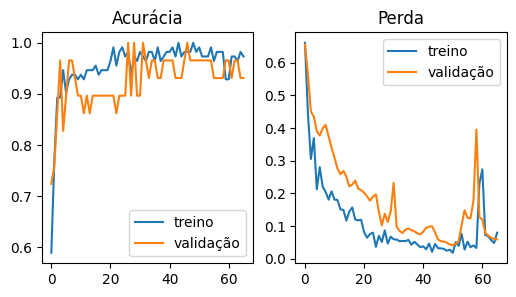

In [6]:
# EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Treinar o modelo
history = model.fit(data_train, labels_train, epochs=200, batch_size=32, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['treino', 'validação'])
plt.title('Acurácia')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['treino', 'validação'])
plt.title('Perda')
plt.show()

In [7]:
# Salvar o modelo
model.save('model_tomatoes.keras')

model = tf.keras.models.load_model('model_tomatoes.keras')

score = model.evaluate(data_test, labels_test)
print("Accuracy: {:.2f}%".format(score[1] * 100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9132 - loss: 0.2221  
Accuracy: 91.67%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


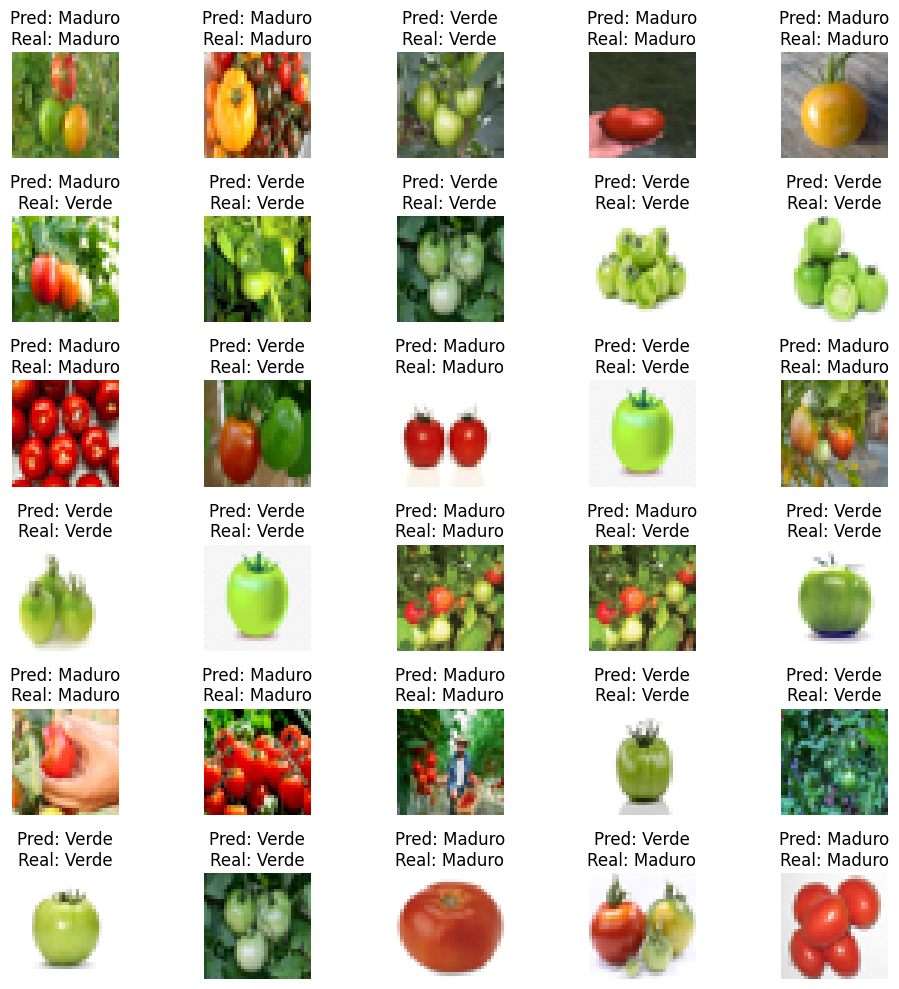

In [8]:
predictions = model.predict(data_test)
predictions = (predictions > 0.5).astype('int32')

fig, axs = plt.subplots(6, 5, figsize=(10, 10))
axs = axs.ravel()

for i in range(30):
    axs[i].imshow(data_test[i])
    axs[i].set_title(f"Pred: {'Maduro' if predictions[i][0] == 1 else 'Verde'}\nReal: {'Maduro' if labels_test[i] == 1 else 'Verde'}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

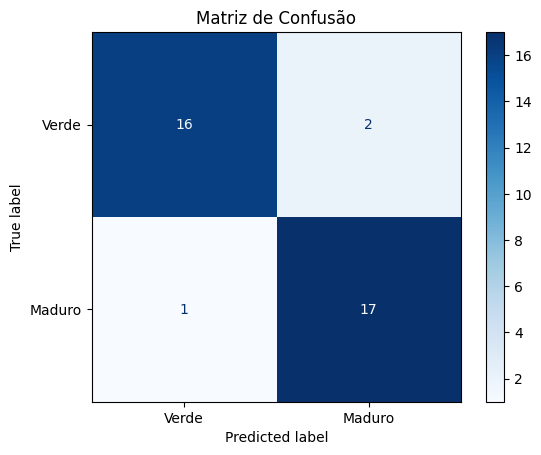

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Criar a matriz de confusão
cm = confusion_matrix(labels_test, predictions)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Verde', 'Maduro'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [9]:


import shap


def normalize_shap_values(shap_values, epsilon=1e-8):
    normalized_shap = []
    for val in shap_values:
        min_val = np.min(val)
        max_val = np.max(val)
        # Evitar divisão por zero
        range_val = max_val - min_val + epsilon
        normalized_shap.append((val - min_val) / range_val)  # Normalizar para o intervalo [0, 1]
    return np.array(normalized_shap)

# Implementação do SHAP
background = data_train[np.random.choice(data_train.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)

# Explicar as previsões para as primeiras 10 imagens de teste
shap_values = explainer.shap_values(data_test[:10])

# Normalizar os valores SHAP para o intervalo [0, 1]
normalized_shap_values = normalize_shap_values(shap_values)




c:\Users\Clean\Documents\python\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Clean\Documents\python\venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


<Figure size 1500x500 with 0 Axes>

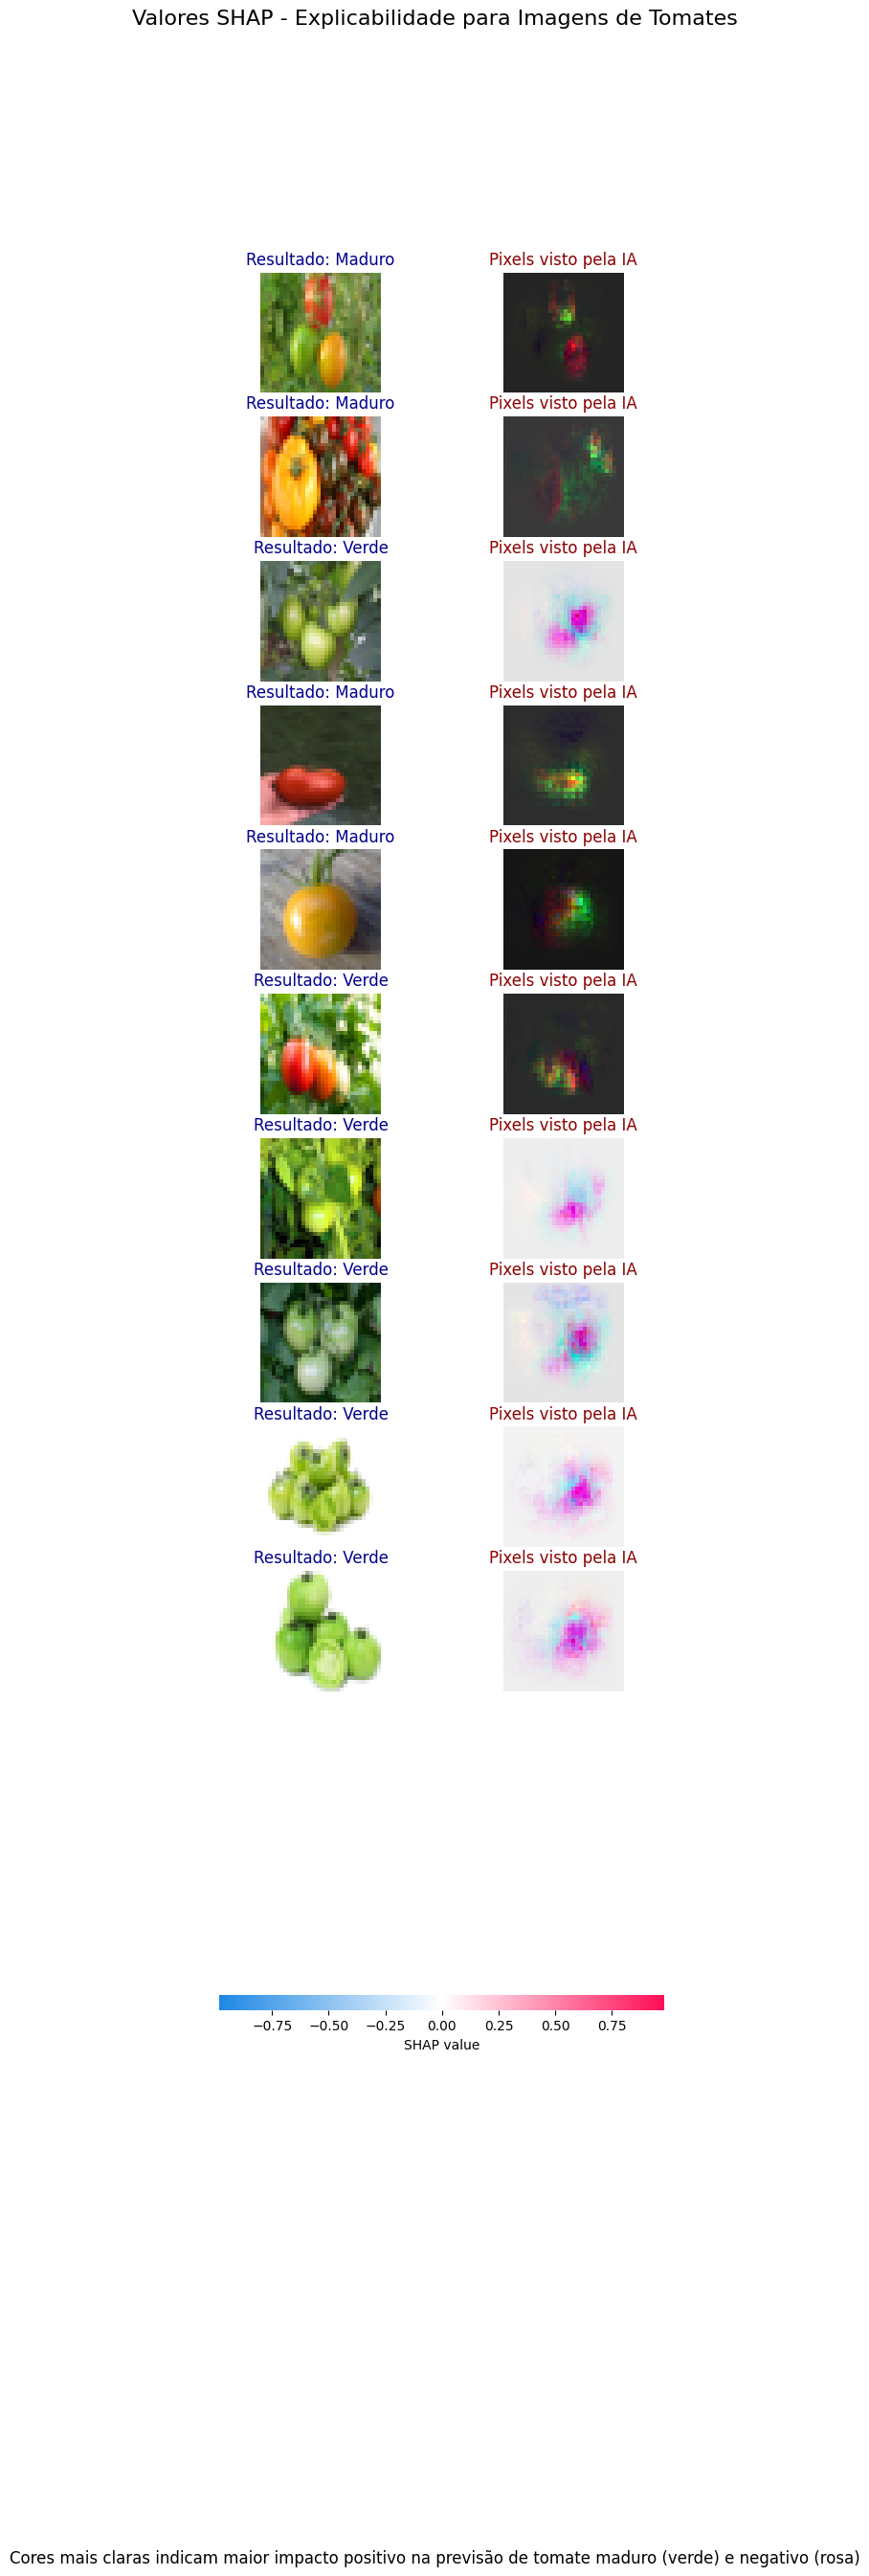

In [10]:
# Títulos personalizados para as imagens da esquerda
titles_left = [f"Resultado: {'Maduro' if labels_test[i] == 1 else 'Verde'}" for i in range(len(normalized_shap_values))]

# Títulos para as imagens da direita
titles_right = ["Pixels visto pela IA" for _ in range(len(normalized_shap_values))]

# Plotar o SHAP com título em cada imagem
plt.figure(figsize=(15, 5))
shap.image_plot(normalized_shap_values, data_test[:10], show=False)

# Acessar os subplots (imagens da esquerda são os subplots pares: 0, 2, 4,... e da direita são ímpares: 1, 3, 5,...)
axes = plt.gcf().axes
for i in range(0, len(titles_left) * 2, 2):  # Subplots da esquerda
    axes[i].set_title(titles_left[i // 2], fontsize=12, color="darkblue")

for i in range(1, len(titles_right) * 2, 2):  # Subplots da direita
    axes[i].set_title(titles_right[i // 2], fontsize=12, color="darkred")

# Adicionar um título geral e uma legenda explicativa
plt.suptitle('Valores SHAP - Explicabilidade para Imagens de Tomates', fontsize=16)
plt.figtext(0.5, 0.01, "Cores mais claras indicam maior impacto positivo na previsão de tomate maduro (verde) e negativo (rosa)", ha="center", fontsize=12)

plt.show()
